In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import sklearn.svm as svm
from sklearn.svm import libsvm 

In [2]:
# train_data = pd.read_pickle('../Processed_Data/train_set.pkl')
# test_data = pd.read_pickle('../Processed_Data/test_set.pkl')

In [3]:
all_train_data = pd.read_csv('alltrain.csv',)
all_test_data = pd.read_csv('alltest.csv')
#Preprocessed in XGBoost.ipynb

In [4]:
all_train_data

,Lat,Long,Time,Length,Start,End,Start_Hour,Start_Day,End_Hour,End_Day,Start_Min,Current_Hour,Current_Min,Current_Day,End_Min,Start_Sec,Current_Sec,End_Sec
0,40.58338,-73.85482,2019-01-17 13:20:02,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,20,17,50,2,2,13
1,40.57990,-73.86292,2019-01-17 13:21:04,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,21,17,50,2,4,13
2,40.57637,-73.87132,2019-01-17 13:22:07,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,22,17,50,2,7,13
3,40.57447,-73.88029,2019-01-17 13:23:09,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,23,17,50,2,9,13
4,40.57262,-73.88921,2019-01-17 13:24:11,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,24,17,50,2,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540039,48.80372,-122.72340,2019-01-03 15:28:30,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,28,3,32,17,30,37
3540040,48.80394,-122.72357,2019-01-03 15:29:31,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,29,3,32,17,31,37
3540041,48.80405,-122.72376,2019-01-03 15:30:34,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,30,3,32,17,34,37
3540042,48.80405,-122.72395,2019-01-03 15:31:36,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,31,3,32,17,36,37


In [3]:
# all_test_data = pd.concat([pd.DataFrame(np.array(test_data[i]).T, columns=['Lat','Long','Time']) for i in range(len(test_data))],ignore_index=True)    
# all_train_data = pd.concat([pd.DataFrame(np.array(train_data[i]).T, columns=['Lat','Long','Time']) for i in range(len(train_data))],ignore_index=True)    

In [14]:
# all_test_data['Timestamp'] = all_test_data['Time'].astype(int)/1e9
# all_train_data['Timestamp'] = all_train_data['Time'].astype(int)/1e9

In [5]:
all_test_data

,Lat,Long,Time,Length,Start,End,Start_Day,Start_Hour,Start_Min,Current_Day,Current_Hour,Current_Min,End_Day,End_Hour,End_Min,Start_Sec,Current_Sec,End_Sec
0,41.63358,-70.91505,2019-01-13 02:56:14,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,56,13,14,51,14,14,23
1,41.63173,-70.91267,2019-01-13 02:57:33,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,57,13,14,51,14,33,23
2,41.63008,-70.91059,2019-01-13 02:58:43,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,58,13,14,51,14,43,23
3,41.62832,-70.90864,2019-01-13 02:59:54,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,59,13,14,51,14,54,23
4,41.62800,-70.90838,2019-01-13 03:00:04,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,3,0,13,14,51,14,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270824,36.93333,-76.04850,2019-01-07 18:25:40,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,25,7,18,30,8,40,57
270825,36.93117,-76.05750,2019-01-07 18:26:57,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,26,7,18,30,8,57,57
270826,36.92800,-76.06717,2019-01-07 18:28:21,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,28,7,18,30,8,21,57
270827,36.92517,-76.07550,2019-01-07 18:29:33,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,29,7,18,30,8,33,57


# Estimated Hour 

In [37]:
X = all_train_data[['Lat', 'Long']]
y = all_train_data[['Current_Hour']]

In [32]:
idx = np.linspace(0, len(all_train_data)-1, 400, dtype=int)
# X = X[:100]
# y = y[:100]

In [33]:
idx

array([      0,    8872,   17744,   26616,   35489,   44361,   53233,
         62106,   70978,   79850,   88722,   97595,  106467,  115339,
        124212,  133084,  141956,  150828,  159701,  168573,  177445,
        186318,  195190,  204062,  212934,  221807,  230679,  239551,
        248424,  257296,  266168,  275040,  283913,  292785,  301657,
        310530,  319402,  328274,  337146,  346019,  354891,  363763,
        372636,  381508,  390380,  399252,  408125,  416997,  425869,
        434742,  443614,  452486,  461358,  470231,  479103,  487975,
        496848,  505720,  514592,  523465,  532337,  541209,  550081,
        558954,  567826,  576698,  585571,  594443,  603315,  612187,
        621060,  629932,  638804,  647677,  656549,  665421,  674293,
        683166,  692038,  700910,  709783,  718655,  727527,  736399,
        745272,  754144,  763016,  771889,  780761,  789633,  798505,
        807378,  816250,  825122,  833995,  842867,  851739,  860611,
        869484,  878

In [38]:
X = X.to_numpy()[idx]
y = y.to_numpy()[idx]

In [42]:
# fit the model
clf = svm.NuSVC(gamma='scale', verbose=2, nu=0.1)
clf.fit(X,y)


[LibSVM]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=2)

In [51]:
X_test = all_test_data[['Lat','Long']].to_numpy()

X_test[0].tolist()

[41.63358, -70.91505]

In [66]:
pred_hour = []
for sample in X_test:
    pred = clf.predict([sample.tolist()])
    pred_hour.append(pred[0])

In [67]:
EstimatedArrival = pd.DataFrame({'Hour': pred_hour}, columns=['Hour'])

In [71]:
from sklearn.metrics import mean_absolute_error
hour_error = mean_absolute_error(pred_hour, all_test_data['End_Hour'])

In [72]:
hour_error

9.43422602453947

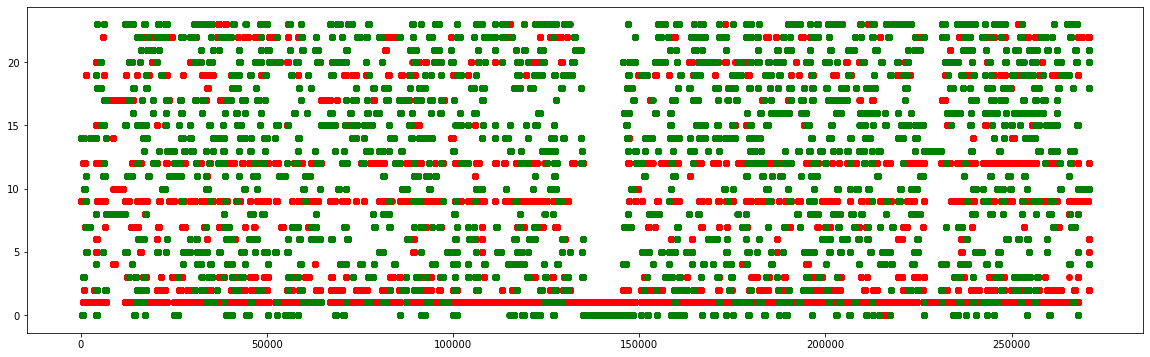

In [76]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_hour, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Hour'], color='g', label='acc')

# Estimated Day

In [77]:
y2 = all_train_data['End_Day']

In [79]:
set(y2)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [81]:
# fit the model
y2 = all_train_data['End_Day'].to_numpy()
clf_day = svm.NuSVC(gamma='scale', verbose=2, nu=0.1)
clf_day.fit(X,y2[idx])


[LibSVM]

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=2)

In [86]:
pred_day = []
for sample in X_test:
    pred = clf_day.predict([sample.tolist()])
    pred_day.append(pred[0])

In [87]:
EstimatedArrival['Day'] = pred_day

In [90]:
day_error = mean_absolute_error(pred_day, all_test_data['End_Day'])

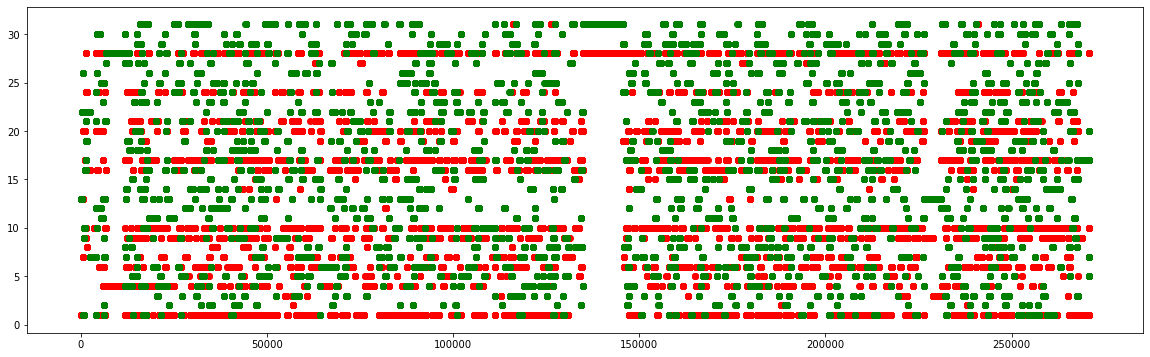

In [91]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_day, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Day'], color='g', label='acc')

# Estimated Minute Prediction

In [97]:
y3 = all_train_data['End_Min'].to_numpy()
y3 = y3[idx]

In [132]:
clf_min = svm.NuSVC(gamma='auto', verbose=2, nu=0.006)
clf_min.fit(X,y3)

[LibSVM]

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.006, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=2)

In [121]:
pred_min = []
for sample in X_test:
    pred = clf_min.predict([sample.tolist()])
    pred_min.append(pred[0])

In [122]:
EstimatedArrival['Min'] = pred_min

In [123]:
min_error = mean_absolute_error(pred_min, all_test_data['End_Min'])

In [124]:
min_error

18.329255729630134

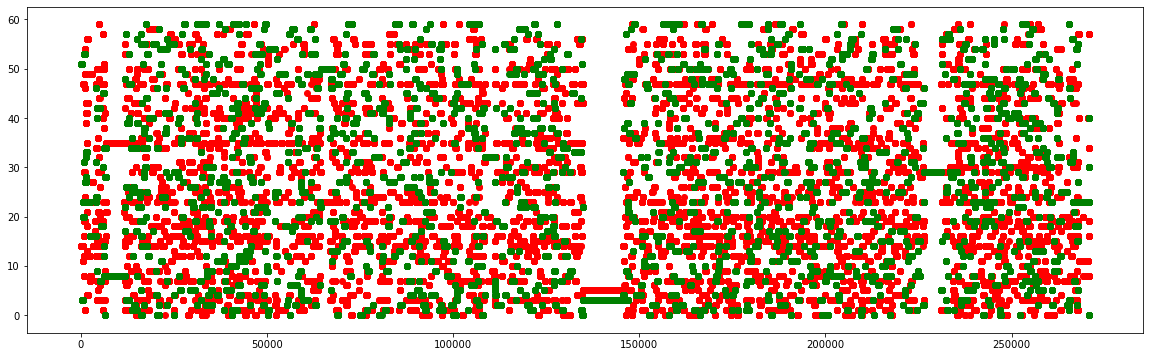

In [125]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_min, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Min'], color='g', label='acc')

# Estimated Seconds 

In [127]:
y4 = all_train_data['End_Sec'].to_numpy()
y4 = y4[idx]

In [129]:
set(y4)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59}

In [147]:
clf_sec = svm.NuSVC(gamma='auto', verbose=2, nu=0.09)
clf_sec.fit(X,y4)

[LibSVM]

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.09, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=2)

In [148]:
pred_sec = []
for sample in X_test:
    pred = clf_sec.predict([sample.tolist()])
    pred_sec.append(pred[0])

In [149]:
EstimatedArrival['Sec'] = pred_sec

sec_error = mean_absolute_error(pred_sec, all_test_data['End_Sec'])

In [150]:
sec_error

19.34951943846486

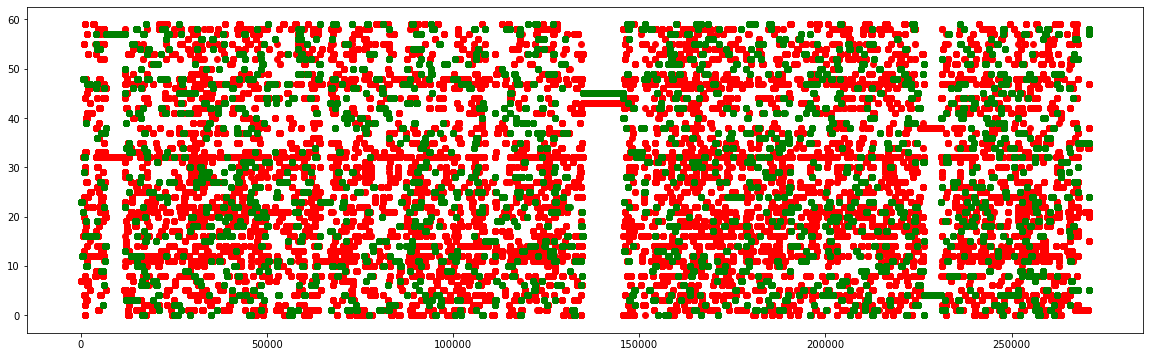

In [151]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_sec, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Sec'], color='g', label='acc')

In [152]:
EstimatedArrival

,Hour,Day,Min,Sec
0,9,13,14,7
1,9,13,14,7
2,9,13,14,7
3,9,13,14,7
4,9,13,14,7
...,...,...,...,...
270824,22,1,40,21
270825,22,1,40,21
270826,22,1,40,21
270827,22,1,40,21


In [156]:
import datetime
from datetime import datetime

def convert_to_day(estday, esthr, estmin, estsec):
    return datetime(2019, 1, estday, esthr, estmin, estsec)

In [159]:
est_arrival_object = []
for i in EstimatedArrival.values:
    obj = convert_to_day(i[1], i[0], i[2], i[3])
    est_arrival_object.append(obj)
result = pd.DataFrame(est_arrival_object, columns=['ETA'])
result.to_csv("Pred_ETA_SVM.csv",index=None)

In [160]:
result

,ETA
0,2019-01-13 09:14:07
1,2019-01-13 09:14:07
2,2019-01-13 09:14:07
3,2019-01-13 09:14:07
4,2019-01-13 09:14:07
...,...
270824,2019-01-01 22:40:21
270825,2019-01-01 22:40:21
270826,2019-01-01 22:40:21
270827,2019-01-01 22:40:21


In [ ]:
r